In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
#General Codes
# -1     Blank
# -2     Don’t know 
# -3     Refused

In [3]:
multi_act = pd.read_csv("ATUS DATA 03-19/atus_activity_0319.dat", 
                        dtype= {"TRCODEP": object, "TRTIER1P": object, "TRTIER2P": object}) #using 2003-2019 activity file
#multi_act

In [4]:
multi_resp = pd.read_csv("ATUS DATA 03-19/atus_resp_0319.dat")
#multi_resp

In [5]:
multi_merged = pd.merge(multi_act, multi_resp, on="TUCASEID")
multi_merged = multi_merged.filter(["TUCASEID","TUACTDUR24","TUCUMDUR","TRTIER1P","TRTIER2P","TRCODEP", 
                                    "TEWHERE","TELFS", "TUFNWGTP","TUSTARTTIM","TUSTOPTIME", "TUYEAR", "TURETOT"])
multi_merged

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR,TURETOT
0,20030100013280,60,60,13,1301,130124,9,2,8.155463e+06,04:00:00,05:00:00,2003,-1
1,20030100013280,30,90,01,0102,010201,-1,2,8.155463e+06,05:00:00,05:30:00,2003,-1
2,20030100013280,600,690,01,0101,010101,-1,2,8.155463e+06,05:30:00,15:30:00,2003,-1
3,20030100013280,150,840,12,1203,120303,1,2,8.155463e+06,15:30:00,18:00:00,2003,-1
4,20030100013280,5,845,11,1101,110101,1,2,8.155463e+06,18:00:00,18:05:00,2003,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4121278,20191212192270,98,690,03,0301,030103,1,1,1.072172e+07,13:52:00,15:30:00,2019,-1
4121279,20191212192270,30,720,18,1812,181201,13,1,1.072172e+07,15:30:00,16:00:00,2019,-1
4121280,20191212192270,390,1110,12,1201,120101,3,1,1.072172e+07,16:00:00,22:30:00,2019,-1
4121281,20191212192270,30,1140,18,1812,181201,13,1,1.072172e+07,22:30:00,23:00:00,2019,-1


In [6]:
#TELFS = employment status 
multi_merged["TURETOT"].unique()

array([-1,  1,  3,  2,  0])

## Retired Population

In [7]:
retired_codes = [1] # #1 yes, I am still retired
multi_merged_retired = multi_merged[multi_merged["TURETOT"].isin(retired_codes)]
multi_merged_retired["TURETOT"].unique()

array([1])

In [8]:
retired_2003 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_retired_weight = retired_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_retired_weight = atus_2003_retired_weight["TUFNWGTP"].sum()
atus_2003_retired_weight

12018510621.796375

## 2003-2019 Residential - Retired

In [9]:
#only residential location from 2003-2019
residential_location = [-1,1,3]
atus_multi_yr_res_retired = multi_merged_retired[multi_merged_retired["TEWHERE"].isin(residential_location)]
#atus_multi_yr_res_retired

In [10]:
#atus residential year seperation by retired population 
atus_2003_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_res_retired = atus_multi_yr_res_retired[atus_multi_yr_res_retired["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_res_retired

### 2003 All Residential Activities - Retired Population

In [11]:
atus_2003_all_res_retired = atus_2003_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_res_retired

In [12]:
atus_2003_all_res_retired_merge = pd.merge(atus_2003_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_retired_merge

In [13]:
atus_2003_all_res_retired_merge["Multiplied Weight"] = atus_2003_all_res_retired_merge["TUACTDUR24"] * atus_2003_all_res_retired_merge["TUFNWGTP"]
#atus_2003_all_res_retired_merge

In [14]:
atus_2003_all_res_retired_multiplied_weight = atus_2003_all_res_retired_merge["Multiplied Weight"].sum()
atus_2003_all_res_retired_multiplied_weight

15226164416990.12

In [15]:
retired_2003 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2003")]
atus_2003_retired_weight = retired_2003.drop_duplicates(subset=["TUCASEID"])
atus_2003_retired_weight = atus_2003_retired_weight["TUFNWGTP"].sum()
atus_2003_retired_weight

12018510621.796375

In [16]:
all_act_2003_res_retired_hpd = atus_2003_all_res_retired_multiplied_weight / atus_2003_retired_weight / 60
all_act_2003_res_retired_hpd

21.11487978299137

### 2004 All Residential Activities - Retired Population

In [17]:
atus_2004_all_res_retired = atus_2004_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_res_retired

In [18]:
atus_2004_all_res_retired_merge = pd.merge(atus_2004_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2004_all_res_retired_merge["Multiplied Weight"] = atus_2004_all_res_retired_merge["TUACTDUR24"] * atus_2004_all_res_retired_merge["TUFNWGTP"]
#atus_2004_all_res_retired_merge

In [19]:
retired_2004 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2004")]
atus_2004_retired_weight = retired_2004.drop_duplicates(subset=["TUCASEID"])
atus_2004_retired_weight = atus_2004_retired_weight["TUFNWGTP"].sum()

atus_2004_all_res_retired_multiplied_weight = atus_2004_all_res_retired_merge["Multiplied Weight"].sum()

In [20]:
all_act_2004_res_retired_hpd = atus_2004_all_res_retired_multiplied_weight / atus_2004_retired_weight / 60
all_act_2004_res_retired_hpd

21.042750720421736

### 2005 All Residential Activities - Retired Population

In [21]:
atus_2005_all_res_retired = atus_2005_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_res_retired

In [22]:
atus_2005_all_res_retired_merge = pd.merge(atus_2005_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2005_all_res_retired_merge["Multiplied Weight"] = atus_2005_all_res_retired_merge["TUACTDUR24"] * atus_2005_all_res_retired_merge["TUFNWGTP"]
#atus_2005_all_res_retired_merge

In [23]:
retired_2005 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2005")]
atus_2005_retired_weight = retired_2005.drop_duplicates(subset=["TUCASEID"])
atus_2005_retired_weight = atus_2005_retired_weight["TUFNWGTP"].sum()

atus_2005_all_res_retired_multiplied_weight = atus_2005_all_res_retired_merge["Multiplied Weight"].sum()

In [24]:
all_act_2005_res_retired_hpd = atus_2005_all_res_retired_multiplied_weight / atus_2005_retired_weight / 60
all_act_2005_res_retired_hpd

20.990164239574423

### 2006 All Residential Activities - Retired Population

In [25]:
atus_2006_all_res_retired = atus_2006_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_res_retired

In [26]:
atus_2006_all_res_retired_merge = pd.merge(atus_2006_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2006_all_res_retired_merge["Multiplied Weight"] = atus_2006_all_res_retired_merge["TUACTDUR24"] * atus_2006_all_res_retired_merge["TUFNWGTP"]
#atus_2006_all_res_retired_merge

In [27]:
retired_2006 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2006")]
atus_2006_retired_weight = retired_2006.drop_duplicates(subset=["TUCASEID"])
atus_2006_retired_weight = atus_2006_retired_weight["TUFNWGTP"].sum()

atus_2006_all_res_retired_multiplied_weight = atus_2006_all_res_retired_merge["Multiplied Weight"].sum()

In [28]:
all_act_2006_res_retired_hpd = atus_2006_all_res_retired_multiplied_weight / atus_2006_retired_weight / 60
all_act_2006_res_retired_hpd

21.175995730290385

### 2007 All Residential Activities - Retired Population

In [29]:
atus_2007_all_res_retired = atus_2007_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_res_retired

In [30]:
atus_2007_all_res_retired_merge = pd.merge(atus_2007_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2007_all_res_retired_merge["Multiplied Weight"] = atus_2007_all_res_retired_merge["TUACTDUR24"] * atus_2007_all_res_retired_merge["TUFNWGTP"]
#atus_2007_all_res_retired_merge

In [31]:
retired_2007 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2007")]
atus_2007_retired_weight = retired_2007.drop_duplicates(subset=["TUCASEID"])
atus_2007_retired_weight = atus_2007_retired_weight["TUFNWGTP"].sum()

atus_2007_all_res_retired_multiplied_weight = atus_2007_all_res_retired_merge["Multiplied Weight"].sum()

In [32]:
all_act_2007_res_retired_hpd = atus_2007_all_res_retired_multiplied_weight / atus_2007_retired_weight / 60
all_act_2007_res_retired_hpd

20.967603125778794

### 2008 All Residential Activities - Retired Population

In [33]:
atus_2008_all_res_retired = atus_2008_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_res_retired

In [34]:
atus_2008_all_res_retired_merge = pd.merge(atus_2008_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2008_all_res_retired_merge["Multiplied Weight"] = atus_2008_all_res_retired_merge["TUACTDUR24"] * atus_2008_all_res_retired_merge["TUFNWGTP"]
#atus_2008_all_res_retired_merge

In [35]:
retired_2008 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2008")]
atus_2008_retired_weight = retired_2008.drop_duplicates(subset=["TUCASEID"])
atus_2008_retired_weight = atus_2008_retired_weight["TUFNWGTP"].sum()

atus_2008_all_res_retired_multiplied_weight = atus_2008_all_res_retired_merge["Multiplied Weight"].sum()

In [36]:
all_act_2008_res_retired_hpd = atus_2008_all_res_retired_multiplied_weight / atus_2008_retired_weight / 60
all_act_2008_res_retired_hpd

21.21985302280641

### 2009 All Residential Activities - Retired Population

In [37]:
atus_2009_all_res_retired = atus_2009_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_res_retired

In [38]:
atus_2009_all_res_retired_merge = pd.merge(atus_2009_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2009_all_res_retired_merge["Multiplied Weight"] = atus_2009_all_res_retired_merge["TUACTDUR24"] * atus_2009_all_res_retired_merge["TUFNWGTP"]
#atus_2009_all_res_retired_merge

In [39]:
retired_2009 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2009")]
atus_2009_retired_weight = retired_2009.drop_duplicates(subset=["TUCASEID"])
atus_2009_retired_weight = atus_2009_retired_weight["TUFNWGTP"].sum()

atus_2009_all_res_retired_multiplied_weight = atus_2009_all_res_retired_merge["Multiplied Weight"].sum()

In [40]:
all_act_2009_res_retired_hpd = atus_2009_all_res_retired_multiplied_weight / atus_2009_retired_weight / 60
all_act_2009_res_retired_hpd

21.304571315331035

### 2010 All Residential Activities - Retired Population

In [41]:
atus_2010_all_res_retired = atus_2010_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_res_retired

In [42]:
atus_2010_all_res_retired_merge = pd.merge(atus_2010_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2010_all_res_retired_merge["Multiplied Weight"] = atus_2010_all_res_retired_merge["TUACTDUR24"] * atus_2010_all_res_retired_merge["TUFNWGTP"]
#atus_2010_all_res_retired_merge

In [43]:
retired_2010 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2010")]
atus_2010_retired_weight = retired_2010.drop_duplicates(subset=["TUCASEID"])
atus_2010_retired_weight = atus_2010_retired_weight["TUFNWGTP"].sum()

atus_2010_all_res_retired_multiplied_weight = atus_2010_all_res_retired_merge["Multiplied Weight"].sum()

In [44]:
all_act_2010_res_retired_hpd = atus_2010_all_res_retired_multiplied_weight / atus_2010_retired_weight / 60
all_act_2010_res_retired_hpd

21.19511082700762

### 2011 All Residential Activities - Retired Population

In [45]:
atus_2011_all_res_retired = atus_2011_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_res_retired

In [46]:
atus_2011_all_res_retired_merge = pd.merge(atus_2011_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_retired_merge["Multiplied Weight"] = atus_2011_all_res_retired_merge["TUACTDUR24"] * atus_2011_all_res_retired_merge["TUFNWGTP"]
#atus_2011_all_res_retired_merge

In [47]:
atus_2011_all_res_retired_merge = pd.merge(atus_2011_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2011_all_res_retired_merge["Multiplied Weight"] = atus_2011_all_res_retired_merge["TUACTDUR24"] * atus_2011_all_res_retired_merge["TUFNWGTP"]
#atus_2011_all_res_retired_merge

In [48]:
retired_2011 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2011")]
atus_2011_retired_weight = retired_2011.drop_duplicates(subset=["TUCASEID"])
atus_2011_retired_weight = atus_2011_retired_weight["TUFNWGTP"].sum()

atus_2011_all_res_retired_multiplied_weight = atus_2011_all_res_retired_merge["Multiplied Weight"].sum()

In [49]:
all_act_2011_res_retired_hpd = atus_2011_all_res_retired_multiplied_weight / atus_2011_retired_weight / 60
all_act_2011_res_retired_hpd

21.09168025497684

### 2012 All Residential Activities - Retired Population

In [50]:
atus_2012_all_res_retired = atus_2012_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_res_retired

In [51]:
atus_2012_all_res_retired_merge = pd.merge(atus_2012_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_retired_merge["Multiplied Weight"] = atus_2012_all_res_retired_merge["TUACTDUR24"] * atus_2012_all_res_retired_merge["TUFNWGTP"]
#atus_2012_all_res_retired_merge

In [52]:
atus_2012_all_res_retired_merge = pd.merge(atus_2012_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2012_all_res_retired_merge["Multiplied Weight"] = atus_2012_all_res_retired_merge["TUACTDUR24"] * atus_2012_all_res_retired_merge["TUFNWGTP"]
#atus_2012_all_res_retired_merge

In [53]:
retired_2012 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2012")]
atus_2012_retired_weight = retired_2012.drop_duplicates(subset=["TUCASEID"])
atus_2012_retired_weight = atus_2012_retired_weight["TUFNWGTP"].sum()

atus_2012_all_res_retired_multiplied_weight = atus_2012_all_res_retired_merge["Multiplied Weight"].sum()

In [54]:
all_act_2012_res_retired_hpd = atus_2012_all_res_retired_multiplied_weight / atus_2012_retired_weight / 60
all_act_2012_res_retired_hpd

21.20186962646235

### 2013 All Residential Activities - Retired Population

In [55]:
atus_2013_all_res_retired = atus_2013_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_res_retired

In [56]:
atus_2013_all_res_retired_merge = pd.merge(atus_2013_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_retired_merge["Multiplied Weight"] = atus_2013_all_res_retired_merge["TUACTDUR24"] * atus_2013_all_res_retired_merge["TUFNWGTP"]
#atus_2013_all_res_retired_merge

In [57]:
atus_2013_all_res_retired_merge = pd.merge(atus_2013_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2013_all_res_retired_merge["Multiplied Weight"] = atus_2013_all_res_retired_merge["TUACTDUR24"] * atus_2013_all_res_retired_merge["TUFNWGTP"]
#atus_2013_all_res_retired_merge

In [58]:
retired_2013 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2013")]
atus_2013_retired_weight = retired_2013.drop_duplicates(subset=["TUCASEID"])
atus_2013_retired_weight = atus_2013_retired_weight["TUFNWGTP"].sum()

atus_2013_all_res_retired_multiplied_weight = atus_2013_all_res_retired_merge["Multiplied Weight"].sum()

In [59]:
all_act_2013_res_retired_hpd = atus_2013_all_res_retired_multiplied_weight / atus_2013_retired_weight / 60
all_act_2013_res_retired_hpd

21.153131359685037

### 2014 All Residential Activities - Retired Population

In [60]:
atus_2014_all_res_retired = atus_2014_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_res_retired

In [61]:
atus_2014_all_res_retired_merge = pd.merge(atus_2014_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_retired_merge["Multiplied Weight"] = atus_2014_all_res_retired_merge["TUACTDUR24"] * atus_2014_all_res_retired_merge["TUFNWGTP"]
#atus_2014_all_res_retired_merge

In [62]:
atus_2014_all_res_retired_merge = pd.merge(atus_2014_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2014_all_res_retired_merge["Multiplied Weight"] = atus_2014_all_res_retired_merge["TUACTDUR24"] * atus_2014_all_res_retired_merge["TUFNWGTP"]
#atus_2014_all_res_retired_merge

In [63]:
retired_2014 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2014")]
atus_2014_retired_weight = retired_2014.drop_duplicates(subset=["TUCASEID"])
atus_2014_retired_weight = atus_2014_retired_weight["TUFNWGTP"].sum()

atus_2014_all_res_retired_multiplied_weight = atus_2014_all_res_retired_merge["Multiplied Weight"].sum()

In [64]:
all_act_2014_res_retired_hpd = atus_2014_all_res_retired_multiplied_weight / atus_2014_retired_weight / 60
all_act_2014_res_retired_hpd

21.17531506370368

### 2015 All Residential Activities - Retired Population

In [65]:
atus_2015_all_res_retired = atus_2015_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_res_retired

In [66]:
atus_2015_all_res_retired_merge = pd.merge(atus_2015_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_retired_merge["Multiplied Weight"] = atus_2015_all_res_retired_merge["TUACTDUR24"] * atus_2015_all_res_retired_merge["TUFNWGTP"]
#atus_2015_all_res_retired_merge

In [67]:
atus_2015_all_res_retired_merge = pd.merge(atus_2015_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2015_all_res_retired_merge["Multiplied Weight"] = atus_2015_all_res_retired_merge["TUACTDUR24"] * atus_2015_all_res_retired_merge["TUFNWGTP"]
#atus_2015_all_res_retired_merge

In [68]:
retired_2015 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2015")]
atus_2015_retired_weight = retired_2015.drop_duplicates(subset=["TUCASEID"])
atus_2015_retired_weight = atus_2015_retired_weight["TUFNWGTP"].sum()

atus_2015_all_res_retired_multiplied_weight = atus_2015_all_res_retired_merge["Multiplied Weight"].sum()

In [69]:
all_act_2015_res_retired_hpd = atus_2015_all_res_retired_multiplied_weight / atus_2015_retired_weight / 60
all_act_2015_res_retired_hpd

21.21513958925124

### 2016 All Residential Activities - Retired Population

In [70]:
atus_2016_all_res_retired = atus_2016_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_res_retired

In [71]:
atus_2016_all_res_retired_merge = pd.merge(atus_2016_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_retired_merge["Multiplied Weight"] = atus_2016_all_res_retired_merge["TUACTDUR24"] * atus_2016_all_res_retired_merge["TUFNWGTP"]
#atus_2016_all_res_retired_merge

In [72]:
atus_2016_all_res_retired_merge = pd.merge(atus_2016_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2016_all_res_retired_merge["Multiplied Weight"] = atus_2016_all_res_retired_merge["TUACTDUR24"] * atus_2016_all_res_retired_merge["TUFNWGTP"]
#atus_2016_all_res_retired_merge

In [73]:
retired_2016 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2016")]
atus_2016_retired_weight = retired_2016.drop_duplicates(subset=["TUCASEID"])
atus_2016_retired_weight = atus_2016_retired_weight["TUFNWGTP"].sum()

atus_2016_all_res_retired_multiplied_weight = atus_2016_all_res_retired_merge["Multiplied Weight"].sum()

In [74]:
all_act_2016_res_retired_hpd = atus_2016_all_res_retired_multiplied_weight / atus_2016_retired_weight / 60
all_act_2016_res_retired_hpd

21.16225710056438

### 2017 All Residential Activities - Retired Population

In [75]:
atus_2017_all_res_retired = atus_2017_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_res_retired

In [76]:
atus_2017_all_res_retired_merge = pd.merge(atus_2017_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_retired_merge["Multiplied Weight"] = atus_2017_all_res_retired_merge["TUACTDUR24"] * atus_2017_all_res_retired_merge["TUFNWGTP"]
#atus_2017_all_res_retired_merge

In [77]:
atus_2017_all_res_retired_merge = pd.merge(atus_2017_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2017_all_res_retired_merge["Multiplied Weight"] = atus_2017_all_res_retired_merge["TUACTDUR24"] * atus_2017_all_res_retired_merge["TUFNWGTP"]
#atus_2017_all_res_retired_merge

In [78]:
retired_2017 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2017")]
atus_2017_retired_weight = retired_2017.drop_duplicates(subset=["TUCASEID"])
atus_2017_retired_weight = atus_2017_retired_weight["TUFNWGTP"].sum()

atus_2017_all_res_retired_multiplied_weight = atus_2017_all_res_retired_merge["Multiplied Weight"].sum()

In [79]:
all_act_2017_res_retired_hpd = atus_2017_all_res_retired_multiplied_weight / atus_2017_retired_weight / 60
all_act_2017_res_retired_hpd

21.292020790122578

### 2018 All Residential Activities - Retired Population

In [80]:
atus_2018_all_res_retired = atus_2018_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_res_retired

In [81]:
atus_2018_all_res_retired_merge = pd.merge(atus_2018_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_retired_merge["Multiplied Weight"] = atus_2018_all_res_retired_merge["TUACTDUR24"] * atus_2018_all_res_retired_merge["TUFNWGTP"]
#atus_2018_all_res_retired_merge

In [82]:
atus_2018_all_res_retired_merge = pd.merge(atus_2018_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2018_all_res_retired_merge["Multiplied Weight"] = atus_2018_all_res_retired_merge["TUACTDUR24"] * atus_2018_all_res_retired_merge["TUFNWGTP"]
#atus_2018_all_res_retired_merge

In [83]:
retired_2018 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2018")]
atus_2018_retired_weight = retired_2018.drop_duplicates(subset=["TUCASEID"])
atus_2018_retired_weight = atus_2018_retired_weight["TUFNWGTP"].sum()

atus_2018_all_res_retired_multiplied_weight = atus_2018_all_res_retired_merge["Multiplied Weight"].sum()

In [84]:
all_act_2018_res_retired_hpd = atus_2018_all_res_retired_multiplied_weight / atus_2018_retired_weight / 60
all_act_2018_res_retired_hpd

21.199616622285113

### 2019 All Residential Activities - Retired Population

In [85]:
atus_2019_all_res_retired = atus_2019_res_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_res_retired

In [86]:
atus_2019_all_res_retired_merge = pd.merge(atus_2019_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_retired_merge["Multiplied Weight"] = atus_2019_all_res_retired_merge["TUACTDUR24"] * atus_2019_all_res_retired_merge["TUFNWGTP"]
#atus_2019_all_res_retired_merge

In [87]:
atus_2019_all_res_retired_merge = pd.merge(atus_2019_all_res_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
atus_2019_all_res_retired_merge["Multiplied Weight"] = atus_2019_all_res_retired_merge["TUACTDUR24"] * atus_2019_all_res_retired_merge["TUFNWGTP"]
#atus_2019_all_res_retired_merge

In [88]:
retired_2019 = multi_merged_retired[multi_merged_retired["TUCASEID"].apply(str).str.startswith("2019")]
atus_2019_retired_weight = retired_2019.drop_duplicates(subset=["TUCASEID"])
atus_2019_retired_weight = atus_2019_retired_weight["TUFNWGTP"].sum()

atus_2019_all_res_retired_multiplied_weight = atus_2019_all_res_retired_merge["Multiplied Weight"].sum()

In [89]:
all_act_2019_res_retired_hpd = atus_2019_all_res_retired_multiplied_weight / atus_2019_retired_weight / 60
all_act_2019_res_retired_hpd

21.139688691869974

### Regresssion: All Residential Activity - Retired 

#### 2003 -2012 Regression 

In [90]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_retired_hpd, all_act_2004_res_retired_hpd, all_act_2005_res_retired_hpd,
                                   all_act_2006_res_retired_hpd, all_act_2007_res_retired_hpd, all_act_2008_res_retired_hpd,
                                   all_act_2009_res_retired_hpd, all_act_2010_res_retired_hpd, all_act_2011_res_retired_hpd,
                                   all_act_2012_res_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

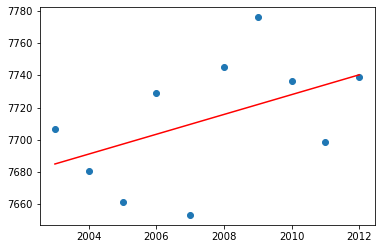

In [91]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [92]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.2237014853999153

In [93]:
all_act_2012_res_retired_slope = model.coef_
all_act_2012_res_retired_slope

array([[6.16767028]])

#### 2003-2019 Regression

In [94]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_res_retired_hpd, all_act_2004_res_retired_hpd, all_act_2005_res_retired_hpd,
                                   all_act_2006_res_retired_hpd, all_act_2007_res_retired_hpd, all_act_2008_res_retired_hpd,
                                   all_act_2009_res_retired_hpd, all_act_2010_res_retired_hpd, all_act_2011_res_retired_hpd,
                                   all_act_2012_res_retired_hpd, all_act_2013_res_retired_hpd, all_act_2014_res_retired_hpd,
                                   all_act_2015_res_retired_hpd, all_act_2016_res_retired_hpd, all_act_2017_res_retired_hpd,
                                   all_act_2018_res_retired_hpd, all_act_2019_res_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

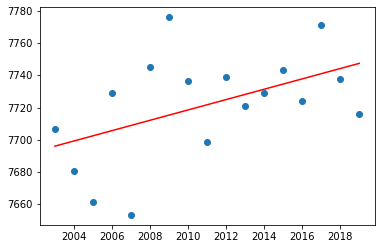

In [95]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [96]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.23277605010980518

In [97]:
all_act_2019_res_retired_slope = model.coef_
all_act_2019_res_retired_slope

array([[3.22004217]])

### 2003-2019 NonResidential - Retired

In [98]:
#non-residential = 2,4,5,6,7,8,9,10,11,30,31,32

In [99]:
nonresidential_location = [2,4,5,6,7,8,9,10,11,30,31,32]
atus_multi_yr_nonres_retired = multi_merged_retired[multi_merged_retired["TEWHERE"].isin(nonresidential_location)]
#atus_multi_yr_res_retired

In [100]:
atus_2003_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_nonres_retired = atus_multi_yr_nonres_retired[atus_multi_yr_nonres_retired["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_nonres_retired

### 2003 All Activities - NonResidential - Retired

In [101]:
atus_2003_all_nonres_retired = atus_2003_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_all_nonres_retired

In [102]:
atus_2003_all_nonres_retired_merge = pd.merge(atus_2003_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_all_res_retired_merge

In [103]:
atus_2003_all_nonres_retired_merge["Multiplied Weight"]=atus_2003_all_nonres_retired_merge["TUACTDUR24"]*atus_2003_all_nonres_retired_merge["TUFNWGTP"]
#atus_2003_all_nonres_retired_merge

In [104]:
atus_2003_all_nonres_retired_multiplied_weight = atus_2003_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2003_all_nonres_retired_multiplied_weight

1385461221836.277

In [105]:
all_act_2003_nonres_retired_hpd = atus_2003_all_nonres_retired_multiplied_weight / atus_2003_retired_weight / 60
all_act_2003_nonres_retired_hpd

1.921288010684189

### 2004 All Activities - NonResidential - Retired

In [106]:
atus_2004_all_nonres_retired = atus_2004_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_all_nonres_retired

In [107]:
atus_2004_all_nonres_retired_merge = pd.merge(atus_2004_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_all_res_retired_merge

In [108]:
atus_2004_all_nonres_retired_merge["Multiplied Weight"]=atus_2004_all_nonres_retired_merge["TUACTDUR24"]*atus_2004_all_nonres_retired_merge["TUFNWGTP"]

atus_2004_all_nonres_retired_multiplied_weight = atus_2004_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2004_all_nonres_retired_multiplied_weight

1470773509443.0469

In [109]:
all_act_2004_nonres_retired_hpd = atus_2004_all_nonres_retired_multiplied_weight / atus_2004_retired_weight / 60
all_act_2004_nonres_retired_hpd

2.0095037087768373

### 2005 All Activities - NonResidential - Retired

In [110]:
atus_2005_all_nonres_retired = atus_2005_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_all_nonres_retired

In [111]:
atus_2005_all_nonres_retired_merge = pd.merge(atus_2005_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_all_res_retired_merge

In [112]:
atus_2005_all_nonres_retired_merge["Multiplied Weight"]=atus_2005_all_nonres_retired_merge["TUACTDUR24"]*atus_2005_all_nonres_retired_merge["TUFNWGTP"]

atus_2005_all_nonres_retired_multiplied_weight = atus_2005_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2005_all_nonres_retired_multiplied_weight

1472739128492.5437

In [113]:
all_act_2005_nonres_retired_hpd = atus_2005_all_nonres_retired_multiplied_weight / atus_2005_retired_weight / 60
all_act_2005_nonres_retired_hpd

2.03627599630701

### 2006 All Activities - NonResidential - Retired

In [114]:
atus_2006_all_nonres_retired = atus_2006_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_all_nonres_retired

In [115]:
atus_2006_all_nonres_retired_merge = pd.merge(atus_2006_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_all_res_retired_merge

In [116]:
atus_2006_all_nonres_retired_merge["Multiplied Weight"]=atus_2006_all_nonres_retired_merge["TUACTDUR24"]*atus_2006_all_nonres_retired_merge["TUFNWGTP"]

atus_2006_all_nonres_retired_multiplied_weight = atus_2006_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2006_all_nonres_retired_multiplied_weight

1387129432985.7202

In [117]:
all_act_2006_nonres_retired_hpd = atus_2006_all_nonres_retired_multiplied_weight / atus_2006_retired_weight / 60
all_act_2006_nonres_retired_hpd

1.9336843755296498

### 2007 All Activities - NonResidential - Retired

In [118]:
atus_2007_all_nonres_retired = atus_2007_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_all_nonres_retired

In [119]:
atus_2007_all_nonres_retired_merge = pd.merge(atus_2007_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_all_res_retired_merge

In [120]:
atus_2007_all_nonres_retired_merge["Multiplied Weight"]=atus_2007_all_nonres_retired_merge["TUACTDUR24"]*atus_2007_all_nonres_retired_merge["TUFNWGTP"]

atus_2007_all_nonres_retired_multiplied_weight = atus_2007_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2007_all_nonres_retired_multiplied_weight

1559684477416.188

In [121]:
all_act_2007_nonres_retired_hpd = atus_2007_all_nonres_retired_multiplied_weight / atus_2007_retired_weight / 60
all_act_2007_nonres_retired_hpd

2.065945342094957

### 2008 All Activities - NonResidential - Retired

In [122]:
atus_2008_all_nonres_retired = atus_2008_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_all_nonres_retired

In [123]:
atus_2008_all_nonres_retired_merge = pd.merge(atus_2008_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_all_res_retired_merge

In [124]:
atus_2008_all_nonres_retired_merge["Multiplied Weight"]=atus_2008_all_nonres_retired_merge["TUACTDUR24"]*atus_2008_all_nonres_retired_merge["TUFNWGTP"]

atus_2008_all_nonres_retired_multiplied_weight = atus_2008_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2008_all_nonres_retired_multiplied_weight

1389330805013.074

In [125]:
all_act_2008_nonres_retired_hpd = atus_2008_all_nonres_retired_multiplied_weight / atus_2008_retired_weight / 60
all_act_2008_nonres_retired_hpd

1.8613909698069666

### 2009 All Activities - NonResidential - Retired

In [126]:
atus_2009_all_nonres_retired = atus_2009_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_all_nonres_retired

In [127]:
atus_2009_all_nonres_retired_merge = pd.merge(atus_2009_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_all_res_retired_merge

In [128]:
atus_2009_all_nonres_retired_merge["Multiplied Weight"]=atus_2009_all_nonres_retired_merge["TUACTDUR24"]*atus_2009_all_nonres_retired_merge["TUFNWGTP"]

atus_2009_all_nonres_retired_multiplied_weight = atus_2009_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2009_all_nonres_retired_multiplied_weight

1374844567362.2314

In [129]:
all_act_2009_nonres_retired_hpd = atus_2009_all_nonres_retired_multiplied_weight / atus_2009_retired_weight / 60
all_act_2009_nonres_retired_hpd

1.8317575422455614

### 2010 All Activities - NonResidential - Retired

In [130]:
atus_2010_all_nonres_retired = atus_2010_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_all_nonres_retired

In [131]:
atus_2010_all_nonres_retired_merge = pd.merge(atus_2010_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_all_res_retired_merge

In [132]:
atus_2010_all_nonres_retired_merge["Multiplied Weight"]=atus_2010_all_nonres_retired_merge["TUACTDUR24"]*atus_2010_all_nonres_retired_merge["TUFNWGTP"]

atus_2010_all_nonres_retired_multiplied_weight = atus_2010_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2010_all_nonres_retired_multiplied_weight

1431626705069.521

In [133]:
all_act_2010_nonres_retired_hpd = atus_2010_all_nonres_retired_multiplied_weight / atus_2010_retired_weight / 60
all_act_2010_nonres_retired_hpd

1.916648834603046

### 2011 All Activities - NonResidential - Retired

In [134]:
atus_2011_all_nonres_retired = atus_2011_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_all_nonres_retired

In [135]:
atus_2011_all_nonres_retired_merge = pd.merge(atus_2011_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_all_res_retired_merge

In [136]:
atus_2011_all_nonres_retired_merge["Multiplied Weight"]=atus_2011_all_nonres_retired_merge["TUACTDUR24"]*atus_2011_all_nonres_retired_merge["TUFNWGTP"]

atus_2011_all_nonres_retired_multiplied_weight = atus_2011_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2011_all_nonres_retired_multiplied_weight

1478510780562.421

In [137]:
all_act_2011_nonres_retired_hpd = atus_2011_all_nonres_retired_multiplied_weight / atus_2011_retired_weight / 60
all_act_2011_nonres_retired_hpd

1.9566444707834383

### 2012 All Activities - NonResidential - Retired

In [138]:
atus_2012_all_nonres_retired = atus_2012_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_all_nonres_retired

In [139]:
atus_2012_all_nonres_retired_merge = pd.merge(atus_2012_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_all_res_retired_merge

In [140]:
atus_2012_all_nonres_retired_merge["Multiplied Weight"]=atus_2012_all_nonres_retired_merge["TUACTDUR24"]*atus_2012_all_nonres_retired_merge["TUFNWGTP"]

atus_2012_all_nonres_retired_multiplied_weight = atus_2012_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2012_all_nonres_retired_multiplied_weight

1537231246618.848

In [141]:
all_act_2012_nonres_retired_hpd = atus_2012_all_nonres_retired_multiplied_weight / atus_2012_retired_weight / 60
all_act_2012_nonres_retired_hpd

1.9390645902820973

### 2013 All Activities - NonResidential - Retired

In [142]:
atus_2013_all_nonres_retired = atus_2013_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_all_nonres_retired

In [143]:
atus_2013_all_nonres_retired_merge = pd.merge(atus_2013_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_all_res_retired_merge

In [144]:
atus_2013_all_nonres_retired_merge["Multiplied Weight"]=atus_2013_all_nonres_retired_merge["TUACTDUR24"]*atus_2013_all_nonres_retired_merge["TUFNWGTP"]

atus_2013_all_nonres_retired_multiplied_weight = atus_2013_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2013_all_nonres_retired_multiplied_weight

1531773250773.6807

In [145]:
all_act_2013_nonres_retired_hpd = atus_2013_all_nonres_retired_multiplied_weight / atus_2013_retired_weight / 60
all_act_2013_nonres_retired_hpd

1.9164702080703888

### 2014 All Activities - NonResidential - Retired

In [146]:
atus_2014_all_nonres_retired = atus_2014_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_all_nonres_retired

In [147]:
atus_2014_all_nonres_retired_merge = pd.merge(atus_2014_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_all_res_retired_merge

In [148]:
atus_2014_all_nonres_retired_merge["Multiplied Weight"]=atus_2014_all_nonres_retired_merge["TUACTDUR24"]*atus_2014_all_nonres_retired_merge["TUFNWGTP"]

atus_2014_all_nonres_retired_multiplied_weight = atus_2014_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2014_all_nonres_retired_multiplied_weight

1667228624136.3445

In [149]:
all_act_2014_nonres_retired_hpd = atus_2014_all_nonres_retired_multiplied_weight / atus_2014_retired_weight / 60
all_act_2014_nonres_retired_hpd

1.9776599944421165

### 2015 All Activities - NonResidential - Retired

In [150]:
atus_2015_all_nonres_retired = atus_2015_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_all_nonres_retired

In [151]:
atus_2015_all_nonres_retired_merge = pd.merge(atus_2015_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_all_res_retired_merge

In [152]:
atus_2015_all_nonres_retired_merge["Multiplied Weight"]=atus_2015_all_nonres_retired_merge["TUACTDUR24"]*atus_2015_all_nonres_retired_merge["TUFNWGTP"]

atus_2015_all_nonres_retired_multiplied_weight = atus_2015_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2015_all_nonres_retired_multiplied_weight

1605299231260.7441

In [153]:
all_act_2015_nonres_retired_hpd = atus_2015_all_nonres_retired_multiplied_weight / atus_2015_retired_weight / 60
all_act_2015_nonres_retired_hpd

1.9307316165745367

### 2016 All Activities - NonResidential - Retired

In [154]:
atus_2016_all_nonres_retired = atus_2016_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_all_nonres_retired

In [155]:
atus_2016_all_nonres_retired_merge = pd.merge(atus_2016_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_all_res_retired_merge

In [156]:
atus_2016_all_nonres_retired_merge["Multiplied Weight"]=atus_2016_all_nonres_retired_merge["TUACTDUR24"]*atus_2016_all_nonres_retired_merge["TUFNWGTP"]

atus_2016_all_nonres_retired_multiplied_weight = atus_2016_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2016_all_nonres_retired_multiplied_weight

1683897199968.2021

In [157]:
all_act_2016_nonres_retired_hpd = atus_2016_all_nonres_retired_multiplied_weight / atus_2016_retired_weight / 60
all_act_2016_nonres_retired_hpd

1.9326307200459392

### 2017 All Activities - NonResidential - Retired

In [158]:
atus_2017_all_nonres_retired = atus_2017_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_all_nonres_retired

In [159]:
atus_2017_all_nonres_retired_merge = pd.merge(atus_2017_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_all_res_retired_merge

In [160]:
atus_2017_all_nonres_retired_merge["Multiplied Weight"]=atus_2017_all_nonres_retired_merge["TUACTDUR24"]*atus_2017_all_nonres_retired_merge["TUFNWGTP"]

atus_2017_all_nonres_retired_multiplied_weight = atus_2017_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2017_all_nonres_retired_multiplied_weight

1616550312702.7126

In [161]:
all_act_2017_nonres_retired_hpd = atus_2017_all_nonres_retired_multiplied_weight / atus_2017_retired_weight / 60
all_act_2017_nonres_retired_hpd

1.8259613636204348

### 2018 All Activities - NonResidential - Retired

In [162]:
atus_2018_all_nonres_retired = atus_2018_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_all_nonres_retired

In [163]:
atus_2018_all_nonres_retired_merge = pd.merge(atus_2018_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_all_res_retired_merge

In [164]:
atus_2018_all_nonres_retired_merge["Multiplied Weight"]=atus_2018_all_nonres_retired_merge["TUACTDUR24"]*atus_2018_all_nonres_retired_merge["TUFNWGTP"]

atus_2018_all_nonres_retired_multiplied_weight = atus_2018_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2018_all_nonres_retired_multiplied_weight

1720431797561.1162

In [165]:
all_act_2018_nonres_retired_hpd = atus_2018_all_nonres_retired_multiplied_weight / atus_2018_retired_weight / 60
all_act_2018_nonres_retired_hpd

1.8545683407032711

### 2019 All Activities - NonResidential - Retired

In [166]:
atus_2019_all_nonres_retired = atus_2019_nonres_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_all_nonres_retired

In [167]:
atus_2019_all_nonres_retired_merge = pd.merge(atus_2019_all_nonres_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_all_res_retired_merge

In [168]:
atus_2019_all_nonres_retired_merge["Multiplied Weight"]=atus_2019_all_nonres_retired_merge["TUACTDUR24"]*atus_2019_all_nonres_retired_merge["TUFNWGTP"]

atus_2019_all_nonres_retired_multiplied_weight = atus_2019_all_nonres_retired_merge["Multiplied Weight"].sum()
atus_2019_all_nonres_retired_multiplied_weight

1836472481191.8345

In [169]:
all_act_2019_nonres_retired_hpd = atus_2019_all_nonres_retired_multiplied_weight / atus_2019_retired_weight / 60
all_act_2019_nonres_retired_hpd

1.9284358526674634

### Regresssion: All Activities - NonResidential - Retired

#### 2003 -2012 Regression

In [170]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_retired_hpd, all_act_2004_nonres_retired_hpd, all_act_2005_nonres_retired_hpd,
                                   all_act_2006_nonres_retired_hpd, all_act_2007_nonres_retired_hpd, all_act_2008_nonres_retired_hpd,
                                   all_act_2009_nonres_retired_hpd, all_act_2010_nonres_retired_hpd, all_act_2011_nonres_retired_hpd,
                                   all_act_2012_nonres_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

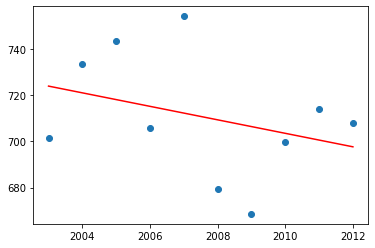

In [171]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [172]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.10850676085170563

In [173]:
all_act_2012_nonres_retired_slope = model.coef_
all_act_2012_nonres_retired_slope

array([[-2.91667326]])

#### 2003 -2019 Regression

In [174]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([all_act_2003_nonres_retired_hpd, all_act_2004_nonres_retired_hpd, all_act_2005_nonres_retired_hpd,
                                   all_act_2006_nonres_retired_hpd, all_act_2007_nonres_retired_hpd, all_act_2008_nonres_retired_hpd,
                                   all_act_2009_nonres_retired_hpd, all_act_2010_nonres_retired_hpd, all_act_2011_nonres_retired_hpd,
                                   all_act_2012_nonres_retired_hpd, all_act_2013_nonres_retired_hpd, all_act_2014_nonres_retired_hpd,
                                   all_act_2015_nonres_retired_hpd, all_act_2016_nonres_retired_hpd, all_act_2017_nonres_retired_hpd,
                                   all_act_2018_nonres_retired_hpd, all_act_2019_nonres_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

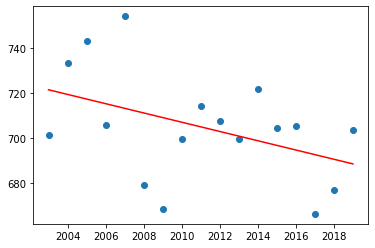

In [175]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [176]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.18321053554840805

In [177]:
all_act_2019_nonres_retired_slope = model.coef_
all_act_2019_nonres_retired_slope

array([[-2.05288136]])

## 2003-2019 Transportation - Retired

### 2003 Transportation

In [178]:
#transporation = 12, 13. 12 = Car, truck, or motorcycle (driver), 13= Car, truck, or motorcycle (passager)

In [320]:
transpoartion_location = [12,13]
atus_multi_yr_tran_retired = multi_merged_retired[multi_merged_retired["TEWHERE"].isin(transpoartion_location)]
#atus_multi_yr_tran_retired

In [321]:
#atus transportation retired population seperated by year
atus_2003_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_tran_retired = atus_multi_yr_tran_retired[atus_multi_yr_tran_retired["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_tran_retired

In [322]:
atus_2003_tran_retired = atus_2003_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2003_tran_retired

In [323]:
atus_2003_tran_retired_merge = pd.merge(atus_2003_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_tran_retired_merge

In [324]:
atus_2003_tran_retired_merge["Multiplied Weight"] = atus_2003_tran_retired_merge["TUACTDUR24"] * atus_2003_tran_retired_merge["TUFNWGTP"]
#atus_2003_tran_retired_merge

In [325]:
atus_2003_tran_retired_multiplied_weight = atus_2003_tran_retired_merge["Multiplied Weight"].sum()
atus_2003_tran_retired_multiplied_weight

608422095535.3794

In [326]:
atus_2003_tran_retired_hpd = atus_2003_tran_retired_multiplied_weight / atus_2003_retired_weight / 60
atus_2003_tran_retired_hpd

0.8437291922455643

### 2004 Transportation

In [186]:
atus_2004_tran_retired = atus_2004_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2004_tran_retired_merge = pd.merge(atus_2004_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2004_tran_retired_merge

In [187]:
atus_2004_tran_retired_merge["Multiplied Weight"] = atus_2004_tran_retired_merge["TUACTDUR24"] * atus_2004_tran_retired_merge["TUFNWGTP"]
atus_2004_tran_retired_multiplied_weight = atus_2004_tran_retired_merge["Multiplied Weight"].sum()
atus_2004_tran_retired_multiplied_weight

627965532511.1997

In [188]:
atus_2004_tran_retired_hpd = atus_2004_tran_retired_multiplied_weight / atus_2004_retired_weight / 60
atus_2004_tran_retired_hpd

0.8579832710225614

### 2005 Transportation

In [189]:
atus_2005_tran_retired = atus_2005_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2005_tran_retired_merge = pd.merge(atus_2005_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2005_tran_retired_merge

In [190]:
atus_2005_tran_retired_merge["Multiplied Weight"] = atus_2005_tran_retired_merge["TUACTDUR24"] * atus_2005_tran_retired_merge["TUFNWGTP"]
atus_2005_tran_retired_multiplied_weight = atus_2005_tran_retired_merge["Multiplied Weight"].sum()
atus_2005_tran_retired_multiplied_weight

626104478709.2015

In [191]:
atus_2005_tran_retired_hpd = atus_2005_tran_retired_multiplied_weight / atus_2005_retired_weight / 60
atus_2005_tran_retired_hpd

0.8656804837397346

### 2006 Transportation

In [192]:
atus_2006_tran_retired = atus_2006_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2006_tran_retired_merge = pd.merge(atus_2006_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2006_tran_retired_merge

In [193]:
atus_2006_tran_retired_merge["Multiplied Weight"] = atus_2006_tran_retired_merge["TUACTDUR24"] * atus_2006_tran_retired_merge["TUFNWGTP"]
atus_2006_tran_retired_multiplied_weight = atus_2006_tran_retired_merge["Multiplied Weight"].sum()
atus_2006_tran_retired_multiplied_weight

573610461924.6222

In [194]:
atus_2006_tran_retired_hpd = atus_2006_tran_retired_multiplied_weight / atus_2006_retired_weight / 60
atus_2006_tran_retired_hpd

0.7996237131790466

### 2007 Transportation

In [195]:
atus_2007_tran_retired = atus_2007_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2007_tran_retired_merge = pd.merge(atus_2007_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2007_tran_retired_merge

In [196]:
atus_2007_tran_retired_merge["Multiplied Weight"] = atus_2007_tran_retired_merge["TUACTDUR24"] * atus_2007_tran_retired_merge["TUFNWGTP"]
atus_2007_tran_retired_multiplied_weight = atus_2007_tran_retired_merge["Multiplied Weight"].sum()
atus_2007_tran_retired_multiplied_weight

664848576016.815

In [197]:
atus_2007_tran_retired_hpd = atus_2007_tran_retired_multiplied_weight / atus_2007_retired_weight / 60
atus_2007_tran_retired_hpd

0.8806530030329245

### 2008 Transportation

In [198]:
atus_2008_tran_retired = atus_2008_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2008_tran_retired_merge = pd.merge(atus_2008_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2008_tran_retired_merge

In [199]:
atus_2008_tran_retired_merge["Multiplied Weight"] = atus_2008_tran_retired_merge["TUACTDUR24"] * atus_2008_tran_retired_merge["TUFNWGTP"]
atus_2008_tran_retired_multiplied_weight = atus_2008_tran_retired_merge["Multiplied Weight"].sum()
atus_2008_tran_retired_multiplied_weight

608530848119.2302

In [200]:
atus_2008_tran_retired_hpd = atus_2008_tran_retired_multiplied_weight / atus_2008_retired_weight / 60
atus_2008_tran_retired_hpd

0.8152945442877808

### 2009 Transportation

In [201]:
atus_2009_tran_retired = atus_2009_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2009_tran_retired_merge = pd.merge(atus_2009_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2009_tran_retired_merge

In [202]:
atus_2009_tran_retired_merge["Multiplied Weight"] = atus_2009_tran_retired_merge["TUACTDUR24"] * atus_2009_tran_retired_merge["TUFNWGTP"]
atus_2009_tran_retired_multiplied_weight = atus_2009_tran_retired_merge["Multiplied Weight"].sum()
atus_2009_tran_retired_multiplied_weight

592410733318.4866

In [203]:
atus_2009_tran_retired_hpd = atus_2009_tran_retired_multiplied_weight / atus_2009_retired_weight / 60
atus_2009_tran_retired_hpd

0.789291280355662

### 2010 Transportation

In [204]:
atus_2010_tran_retired = atus_2010_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2010_tran_retired_merge = pd.merge(atus_2010_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2010_tran_retired_merge

In [205]:
atus_2010_tran_retired_merge["Multiplied Weight"] = atus_2010_tran_retired_merge["TUACTDUR24"] * atus_2010_tran_retired_merge["TUFNWGTP"]
atus_2010_tran_retired_multiplied_weight = atus_2010_tran_retired_merge["Multiplied Weight"].sum()
atus_2010_tran_retired_multiplied_weight

580342029000.5486

In [206]:
atus_2010_tran_retired_hpd = atus_2010_tran_retired_multiplied_weight / atus_2010_retired_weight / 60
atus_2010_tran_retired_hpd

0.7769566393364069

### 2011 Transportation

In [207]:
atus_2011_tran_retired = atus_2011_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2011_tran_retired_merge = pd.merge(atus_2011_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2011_tran_retired_merge

In [208]:
atus_2011_tran_retired_merge["Multiplied Weight"] = atus_2011_tran_retired_merge["TUACTDUR24"] * atus_2011_tran_retired_merge["TUFNWGTP"]
atus_2011_tran_retired_multiplied_weight = atus_2011_tran_retired_merge["Multiplied Weight"].sum()
atus_2011_tran_retired_multiplied_weight

630988410880.9258

In [209]:
atus_2011_tran_retired_hpd = atus_2011_tran_retired_multiplied_weight / atus_2011_retired_weight / 60
atus_2011_tran_retired_hpd

0.835042937467758

### 2012 Transportation

In [210]:
atus_2012_tran_retired = atus_2012_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2012_tran_retired_merge = pd.merge(atus_2012_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2012_tran_retired_merge

In [211]:
atus_2012_tran_retired_merge["Multiplied Weight"] = atus_2012_tran_retired_merge["TUACTDUR24"] * atus_2012_tran_retired_merge["TUFNWGTP"]
atus_2012_tran_retired_multiplied_weight = atus_2012_tran_retired_merge["Multiplied Weight"].sum()
atus_2012_tran_retired_multiplied_weight

619521336784.0198

In [212]:
atus_2012_tran_retired_hpd = atus_2012_tran_retired_multiplied_weight / atus_2012_retired_weight / 60
atus_2012_tran_retired_hpd

0.781464655837808

### 2013 Transportation

In [213]:
atus_2013_tran_retired = atus_2013_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2013_tran_retired_merge = pd.merge(atus_2013_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2013_tran_retired_merge

In [214]:
atus_2013_tran_retired_merge["Multiplied Weight"] = atus_2013_tran_retired_merge["TUACTDUR24"] * atus_2013_tran_retired_merge["TUFNWGTP"]
atus_2013_tran_retired_multiplied_weight = atus_2013_tran_retired_merge["Multiplied Weight"].sum()
atus_2013_tran_retired_multiplied_weight

671869745822.0532

In [215]:
atus_2013_tran_retired_hpd = atus_2013_tran_retired_multiplied_weight / atus_2013_retired_weight / 60
atus_2013_tran_retired_hpd

0.8406063697230832

### 2014 Transportation

In [216]:
atus_2014_tran_retired = atus_2014_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2014_tran_retired_merge = pd.merge(atus_2014_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2014_tran_retired_merge

In [217]:
atus_2014_tran_retired_merge["Multiplied Weight"] = atus_2014_tran_retired_merge["TUACTDUR24"] * atus_2014_tran_retired_merge["TUFNWGTP"]
atus_2014_tran_retired_multiplied_weight = atus_2014_tran_retired_merge["Multiplied Weight"].sum()
atus_2014_tran_retired_multiplied_weight

643417177085.0723

In [218]:
atus_2014_tran_retired_hpd = atus_2014_tran_retired_multiplied_weight / atus_2014_retired_weight / 60
atus_2014_tran_retired_hpd

0.763218908574812

### 2015 Transportation

In [219]:
atus_2015_tran_retired = atus_2015_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2015_tran_retired_merge = pd.merge(atus_2015_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2015_tran_retired_merge

In [220]:
atus_2015_tran_retired_merge["Multiplied Weight"] = atus_2015_tran_retired_merge["TUACTDUR24"] * atus_2015_tran_retired_merge["TUFNWGTP"]
atus_2015_tran_retired_multiplied_weight = atus_2015_tran_retired_merge["Multiplied Weight"].sum()
atus_2015_tran_retired_multiplied_weight

651543291881.8362

In [221]:
atus_2015_tran_retired_hpd = atus_2015_tran_retired_multiplied_weight / atus_2015_retired_weight / 60
atus_2015_tran_retired_hpd

0.7836266340296943

### 2016 Transportation

In [222]:
atus_2016_tran_retired = atus_2016_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2016_tran_retired_merge = pd.merge(atus_2016_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2016_tran_retired_merge

In [223]:
atus_2016_tran_retired_merge["Multiplied Weight"] = atus_2016_tran_retired_merge["TUACTDUR24"] * atus_2016_tran_retired_merge["TUFNWGTP"]
atus_2016_tran_retired_multiplied_weight = atus_2016_tran_retired_merge["Multiplied Weight"].sum()
atus_2016_tran_retired_multiplied_weight

707344995782.0161

In [224]:
atus_2016_tran_retired_hpd = atus_2016_tran_retired_multiplied_weight / atus_2016_retired_weight / 60
atus_2016_tran_retired_hpd

0.8118290525959091

### 2017 Transportation

In [225]:
atus_2017_tran_retired = atus_2017_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2017_tran_retired_merge = pd.merge(atus_2017_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2017_tran_retired_merge

In [226]:
atus_2017_tran_retired_merge["Multiplied Weight"] = atus_2017_tran_retired_merge["TUACTDUR24"] * atus_2017_tran_retired_merge["TUFNWGTP"]
atus_2017_tran_retired_multiplied_weight = atus_2017_tran_retired_merge["Multiplied Weight"].sum()
atus_2017_tran_retired_multiplied_weight

712686933591.0695

In [227]:
atus_2017_tran_retired_hpd = atus_2017_tran_retired_multiplied_weight / atus_2017_retired_weight / 60
atus_2017_tran_retired_hpd

0.8050097759832203

### 2018 Transportation

In [228]:
atus_2018_tran_retired = atus_2018_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2018_tran_retired_merge = pd.merge(atus_2018_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2018_tran_retired_merge

In [229]:
atus_2018_tran_retired_merge["Multiplied Weight"] = atus_2018_tran_retired_merge["TUACTDUR24"] * atus_2018_tran_retired_merge["TUFNWGTP"]
atus_2018_tran_retired_multiplied_weight = atus_2018_tran_retired_merge["Multiplied Weight"].sum()
atus_2018_tran_retired_multiplied_weight

762759949473.0009

In [230]:
atus_2018_tran_retired_hpd = atus_2018_tran_retired_multiplied_weight / atus_2018_retired_weight / 60
atus_2018_tran_retired_hpd

0.822229893596699

### 2019 Transportation

In [231]:
atus_2019_tran_retired = atus_2019_tran_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
atus_2019_tran_retired_merge = pd.merge(atus_2019_tran_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2019_tran_retired_merge

In [232]:
atus_2019_tran_retired_merge["Multiplied Weight"] = atus_2019_tran_retired_merge["TUACTDUR24"] * atus_2019_tran_retired_merge["TUFNWGTP"]
atus_2019_tran_retired_multiplied_weight = atus_2019_tran_retired_merge["Multiplied Weight"].sum()
atus_2019_tran_retired_multiplied_weight

775154624519.3356

In [233]:
atus_2019_tran_retired_hpd = atus_2019_tran_retired_multiplied_weight / atus_2019_retired_weight / 60
atus_2019_tran_retired_hpd

0.813971341576517

### Regresssion: Transportation - Retired

#### 2003 -2012 Regression

In [234]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_retired_hpd, atus_2004_tran_retired_hpd, atus_2005_tran_retired_hpd,
                                   atus_2006_tran_retired_hpd, atus_2007_tran_retired_hpd, atus_2008_tran_retired_hpd,
                                   atus_2009_tran_retired_hpd, atus_2010_tran_retired_hpd, atus_2011_tran_retired_hpd,
                                   atus_2012_tran_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

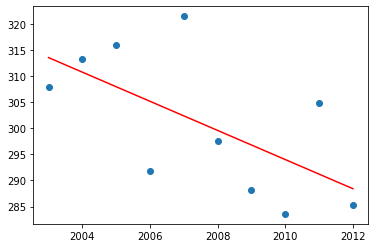

In [235]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [236]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.3852420054752036

In [237]:
tran_2012_retired_slope = model.coef_
tran_2012_retired_slope

array([[-2.78934801]])

#### 2003 -2019 Regression

In [238]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_tran_retired_hpd, atus_2004_tran_retired_hpd, atus_2005_tran_retired_hpd,
                                   atus_2006_tran_retired_hpd, atus_2007_tran_retired_hpd, atus_2008_tran_retired_hpd,
                                   atus_2009_tran_retired_hpd, atus_2010_tran_retired_hpd, atus_2011_tran_retired_hpd,
                                   atus_2012_tran_retired_hpd, atus_2013_tran_retired_hpd, atus_2014_tran_retired_hpd,
                                   atus_2015_tran_retired_hpd, atus_2016_tran_retired_hpd, atus_2017_tran_retired_hpd,
                                   atus_2018_tran_retired_hpd, atus_2019_tran_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

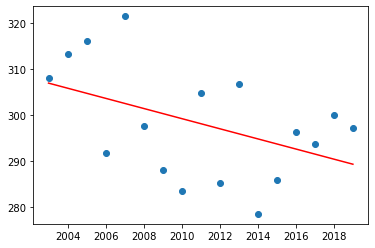

In [239]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [240]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.20723931903457427

In [241]:
tran_2019_retired_slope = model.coef_
tran_2019_retired_slope

array([[-1.09905095]])

### 2003-2019 - Unspecified- Retired

In [242]:
#unspecified = 89, 89 = Unspecified place

In [243]:
unspecified_location = [89]
atus_multi_yr_unsp_retired = multi_merged_retired[multi_merged_retired["TEWHERE"].isin(unspecified_location)]
atus_multi_yr_unsp_retired

,TUCASEID,TUACTDUR24,TUCUMDUR,TRTIER1P,TRTIER2P,TRCODEP,TEWHERE,TELFS,TUFNWGTP,TUSTARTTIM,TUSTOPTIME,TUYEAR,TURETOT
3588,20030101032616,10,750,04,0405,040508,89,5,1.387219e+06,16:20:00,16:30:00,2003,1
16808,20030112021285,10,235,04,0405,040507,89,5,1.236652e+06,07:45:00,07:55:00,2003,1
16812,20030112021285,10,580,04,0405,040507,89,5,1.236652e+06,13:30:00,13:40:00,2003,1
16998,20030112021309,30,620,13,1301,130131,89,5,7.127272e+06,13:50:00,14:20:00,2003,1
17712,20030112021408,15,351,13,1301,130131,89,4,6.199926e+06,09:36:00,09:51:00,2003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4105251,20191111191763,1,871,04,0405,040507,89,5,8.980968e+05,18:30:00,18:31:00,2019,1
4114300,20191211191655,90,630,13,1301,130131,89,5,9.197335e+06,13:00:00,14:30:00,2019,1
4115569,20191211191865,40,510,04,0401,040111,89,5,7.856008e+06,11:50:00,12:30:00,2019,1
4115570,20191211191865,10,520,04,0401,040112,89,5,7.856008e+06,12:30:00,12:40:00,2019,1


In [244]:
#atus transportation retired population seperated by year
#unsp = unspecified
atus_2003_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2003")]
atus_2004_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2004")]
atus_2005_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2005")]
atus_2006_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2006")]
atus_2007_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2007")]
atus_2008_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2008")]
atus_2009_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2009")]
atus_2010_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2010")]
atus_2011_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2011")]
atus_2012_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2012")]
atus_2013_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2013")]
atus_2014_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2014")]
atus_2015_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2015")]
atus_2016_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2016")]
atus_2017_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2017")]
atus_2018_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2018")]
atus_2019_unsp_retired = atus_multi_yr_unsp_retired[atus_multi_yr_unsp_retired["TUCASEID"].apply(str).str.startswith("2019")]
#atus_2003_unsp_retired
#atus_2004_unsp_retired["TRCODEP"]

### 2003 Unspecified- Retired

In [245]:
atus_2003_unsp_retired = atus_2003_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24",])
#atus_2003_unsp_retired

In [246]:
atus_2003_unsp_retired_merge = pd.merge(atus_2003_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])
#atus_2003_unsp_retired_merge

In [247]:
atus_2003_unsp_retired_merge["Multiplied Weight"] = atus_2003_unsp_retired_merge["TUACTDUR24"] * atus_2003_unsp_retired_merge["TUFNWGTP"]
#atus_2003_unsp_retired_merge

In [248]:
atus_2003_unsp_retired_multiplied_weight = atus_2003_unsp_retired_merge["Multiplied Weight"].sum()
atus_2003_unsp_retired_multiplied_weight

22355967393.14839

In [249]:
atus_2003_unsp_retired_hpd = atus_2003_unsp_retired_multiplied_weight / atus_2003_retired_weight / 60
atus_2003_unsp_retired_hpd

0.031002132317189044

### 2004 Unspecified- Retired

In [250]:
atus_2004_unsp_retired = atus_2004_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2004_unsp_retired

In [251]:
atus_2004_unsp_retired_merge = pd.merge(atus_2004_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2004_unsp_retired_merge["Multiplied Weight"] = atus_2004_unsp_retired_merge["TUACTDUR24"] * atus_2004_unsp_retired_merge["TUFNWGTP"]

atus_2004_unsp_retired_multiplied_weight = atus_2004_unsp_retired_merge["Multiplied Weight"].sum()
atus_2004_unsp_retired_multiplied_weight

17227012923.188663

In [252]:
atus_2004_unsp_retired_hpd = atus_2004_unsp_retired_multiplied_weight / atus_2004_retired_weight / 60
atus_2004_unsp_retired_hpd

0.02353710216973053

### 2005 Unspecified- Retired

In [253]:
atus_2005_unsp_retired = atus_2005_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2005_unsp_retired

In [254]:
atus_2005_unsp_retired_merge = pd.merge(atus_2005_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2005_unsp_retired_merge["Multiplied Weight"] = atus_2005_unsp_retired_merge["TUACTDUR24"] * atus_2005_unsp_retired_merge["TUFNWGTP"]

atus_2005_unsp_retired_multiplied_weight = atus_2005_unsp_retired_merge["Multiplied Weight"].sum()
atus_2005_unsp_retired_multiplied_weight

16016751371.525757

In [255]:
atus_2005_unsp_retired_hpd = atus_2005_unsp_retired_multiplied_weight / atus_2005_retired_weight / 60
atus_2005_unsp_retired_hpd

0.022145487768793538

### 2006 Unspecified- Retired

In [256]:
atus_2006_unsp_retired = atus_2006_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2006_unsp_retired

In [257]:
atus_2006_unsp_retired_merge = pd.merge(atus_2006_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2006_unsp_retired_merge["Multiplied Weight"] = atus_2006_unsp_retired_merge["TUACTDUR24"] * atus_2006_unsp_retired_merge["TUFNWGTP"]

atus_2006_unsp_retired_multiplied_weight = atus_2006_unsp_retired_merge["Multiplied Weight"].sum()
atus_2006_unsp_retired_multiplied_weight

12508457849.674261

In [258]:
atus_2006_unsp_retired_hpd = atus_2006_unsp_retired_multiplied_weight / atus_2006_retired_weight / 60
atus_2006_unsp_retired_hpd

0.0174370242103682

### 2007 Unspecified- Retired

In [259]:
atus_2007_unsp_retired = atus_2007_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2007_unsp_retired

In [260]:
atus_2007_unsp_retired_merge = pd.merge(atus_2007_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2007_unsp_retired_merge["Multiplied Weight"] = atus_2007_unsp_retired_merge["TUACTDUR24"] * atus_2007_unsp_retired_merge["TUFNWGTP"]

atus_2007_unsp_retired_multiplied_weight = atus_2007_unsp_retired_merge["Multiplied Weight"].sum()
atus_2007_unsp_retired_multiplied_weight

21255431097.986927

In [261]:
atus_2007_unsp_retired_hpd = atus_2007_unsp_retired_multiplied_weight / atus_2007_retired_weight / 60
atus_2007_unsp_retired_hpd

0.02815477072891885

### 2008 Unspecified- Retired

In [262]:
atus_2008_unsp_retired = atus_2008_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2008_unsp_retired

In [263]:
atus_2008_unsp_retired_merge = pd.merge(atus_2008_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2008_unsp_retired_merge["Multiplied Weight"] = atus_2008_unsp_retired_merge["TUACTDUR24"] * atus_2008_unsp_retired_merge["TUFNWGTP"]

atus_2008_unsp_retired_multiplied_weight = atus_2008_unsp_retired_merge["Multiplied Weight"].sum()
atus_2008_unsp_retired_multiplied_weight

18724688609.650013

In [264]:
atus_2008_unsp_retired_hpd = atus_2008_unsp_retired_multiplied_weight / atus_2008_retired_weight / 60
atus_2008_unsp_retired_hpd

0.025086873597481282

### 2009 Unspecified- Retired

In [265]:
atus_2009_unsp_retired = atus_2009_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2009_unsp_retired

In [266]:
atus_2009_unsp_retired_merge = pd.merge(atus_2009_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2009_unsp_retired_merge["Multiplied Weight"] = atus_2009_unsp_retired_merge["TUACTDUR24"] * atus_2009_unsp_retired_merge["TUFNWGTP"]

atus_2009_unsp_retired_multiplied_weight = atus_2009_unsp_retired_merge["Multiplied Weight"].sum()
atus_2009_unsp_retired_multiplied_weight

13872809151.827946

In [267]:
atus_2009_unsp_retired_hpd = atus_2009_unsp_retired_multiplied_weight / atus_2009_retired_weight / 60
atus_2009_unsp_retired_hpd

0.018483269599521842

### 2010 Unspecified- Retired

In [268]:
atus_2010_unsp_retired = atus_2010_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2010_unsp_retired

In [269]:
atus_2010_unsp_retired_merge = pd.merge(atus_2010_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2010_unsp_retired_merge["Multiplied Weight"] = atus_2010_unsp_retired_merge["TUACTDUR24"] * atus_2010_unsp_retired_merge["TUFNWGTP"]

atus_2010_unsp_retired_multiplied_weight = atus_2010_unsp_retired_merge["Multiplied Weight"].sum()
atus_2010_unsp_retired_multiplied_weight

20489673748.27497

In [270]:
atus_2010_unsp_retired_hpd = atus_2010_unsp_retired_multiplied_weight / atus_2010_retired_weight / 60
atus_2010_unsp_retired_hpd

0.02743138918264366

### 2011 Unspecified- Retired

In [271]:
atus_2011_unsp_retired = atus_2011_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2011_unsp_retired

In [272]:
atus_2011_unsp_retired_merge = pd.merge(atus_2011_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2011_unsp_retired_merge["Multiplied Weight"] = atus_2011_unsp_retired_merge["TUACTDUR24"] * atus_2011_unsp_retired_merge["TUFNWGTP"]

atus_2011_unsp_retired_multiplied_weight = atus_2011_unsp_retired_merge["Multiplied Weight"].sum()
atus_2011_unsp_retired_multiplied_weight

14614040732.17773

In [273]:
atus_2011_unsp_retired_hpd = atus_2011_unsp_retired_multiplied_weight / atus_2011_retired_weight / 60
atus_2011_unsp_retired_hpd

0.019340056474625267

### 2012 Unspecified- Retired

In [274]:
atus_2012_unsp_retired = atus_2012_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2012_unsp_retired

In [275]:
atus_2012_unsp_retired_merge = pd.merge(atus_2012_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2012_unsp_retired_merge["Multiplied Weight"] = atus_2012_unsp_retired_merge["TUACTDUR24"] * atus_2012_unsp_retired_merge["TUFNWGTP"]

atus_2012_unsp_retired_multiplied_weight = atus_2012_unsp_retired_merge["Multiplied Weight"].sum()
atus_2012_unsp_retired_multiplied_weight

7268893655.027723

In [276]:
atus_2012_unsp_retired_hpd = atus_2012_unsp_retired_multiplied_weight / atus_2012_retired_weight / 60
atus_2012_unsp_retired_hpd

0.009168987637996697

### 2013 Unspecified- Retired

In [277]:
atus_2013_unsp_retired = atus_2013_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2013_unsp_retired

In [278]:
atus_2013_unsp_retired_merge = pd.merge(atus_2013_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2013_unsp_retired_merge["Multiplied Weight"] = atus_2013_unsp_retired_merge["TUACTDUR24"] * atus_2013_unsp_retired_merge["TUFNWGTP"]

atus_2013_unsp_retired_multiplied_weight = atus_2013_unsp_retired_merge["Multiplied Weight"].sum()
atus_2013_unsp_retired_multiplied_weight

10773091875.455845

In [279]:
atus_2013_unsp_retired_hpd = atus_2013_unsp_retired_multiplied_weight / atus_2013_retired_weight / 60
atus_2013_unsp_retired_hpd

0.013478698376334792

### 2014 Unspecified- Retired

In [280]:
atus_2014_unsp_retired = atus_2014_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2014_unsp_retired

In [281]:
atus_2014_unsp_retired_merge = pd.merge(atus_2014_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2014_unsp_retired_merge["Multiplied Weight"] = atus_2014_unsp_retired_merge["TUACTDUR24"] * atus_2014_unsp_retired_merge["TUFNWGTP"]

atus_2014_unsp_retired_multiplied_weight = atus_2014_unsp_retired_merge["Multiplied Weight"].sum()
atus_2014_unsp_retired_multiplied_weight

13843423993.426697

In [282]:
atus_2014_unsp_retired_hpd = atus_2014_unsp_retired_multiplied_weight / atus_2014_retired_weight / 60
atus_2014_unsp_retired_hpd

0.016421014743603145

### 2015 Unspecified- Retired

In [283]:
atus_2015_unsp_retired = atus_2015_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2015_unsp_retired

In [284]:
atus_2015_unsp_retired_merge = pd.merge(atus_2015_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2015_unsp_retired_merge["Multiplied Weight"] = atus_2015_unsp_retired_merge["TUACTDUR24"] * atus_2015_unsp_retired_merge["TUFNWGTP"]

atus_2015_unsp_retired_multiplied_weight = atus_2015_unsp_retired_merge["Multiplied Weight"].sum()
atus_2015_unsp_retired_multiplied_weight

11212509348.141996

In [285]:
atus_2015_unsp_retired_hpd = atus_2015_unsp_retired_multiplied_weight / atus_2015_retired_weight / 60
atus_2015_unsp_retired_hpd

0.0134855520254585

### 2016 Unspecified- Retired

In [286]:
atus_2016_unsp_retired = atus_2016_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2016_unsp_retired

In [287]:
atus_2016_unsp_retired_merge = pd.merge(atus_2016_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2016_unsp_retired_merge["Multiplied Weight"] = atus_2016_unsp_retired_merge["TUACTDUR24"] * atus_2016_unsp_retired_merge["TUFNWGTP"]

atus_2016_unsp_retired_multiplied_weight = atus_2016_unsp_retired_merge["Multiplied Weight"].sum()
atus_2016_unsp_retired_multiplied_weight

12763499223.545464

In [288]:
atus_2016_unsp_retired_hpd = atus_2016_unsp_retired_multiplied_weight / atus_2016_retired_weight / 60
atus_2016_unsp_retired_hpd

0.014648834082729193

### 2017 Unspecified- Retired

In [289]:
atus_2017_unsp_retired = atus_2017_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2017_unsp_retired

In [290]:
atus_2017_unsp_retired_merge = pd.merge(atus_2017_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2017_unsp_retired_merge["Multiplied Weight"] = atus_2017_unsp_retired_merge["TUACTDUR24"] * atus_2017_unsp_retired_merge["TUFNWGTP"]

atus_2017_unsp_retired_multiplied_weight = atus_2017_unsp_retired_merge["Multiplied Weight"].sum()
atus_2017_unsp_retired_multiplied_weight

23026838555.734947

In [291]:
atus_2017_unsp_retired_hpd = atus_2017_unsp_retired_multiplied_weight / atus_2017_retired_weight / 60
atus_2017_unsp_retired_hpd

0.026009779713444505

### 2018 Unspecified- Retired

In [292]:
atus_2018_unsp_retired = atus_2018_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2018_unsp_retired

In [293]:
atus_2018_unsp_retired_merge = pd.merge(atus_2018_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2018_unsp_retired_merge["Multiplied Weight"] = atus_2018_unsp_retired_merge["TUACTDUR24"] * atus_2018_unsp_retired_merge["TUFNWGTP"]

atus_2018_unsp_retired_multiplied_weight = atus_2018_unsp_retired_merge["Multiplied Weight"].sum()
atus_2018_unsp_retired_multiplied_weight

22834126716.5151

In [294]:
atus_2018_unsp_retired_hpd = atus_2018_unsp_retired_multiplied_weight / atus_2018_retired_weight / 60
atus_2018_unsp_retired_hpd

0.02461443025878002

### 2019 Unspecified- Retired

In [295]:
atus_2019_unsp_retired = atus_2019_unsp_retired.groupby(["TUCASEID"]).sum().filter(["TUCASEID", "TUACTDUR24"])
#atus_2019_unsp_retired

In [296]:
atus_2019_unsp_retired_merge = pd.merge(atus_2019_unsp_retired, multi_resp, on= "TUCASEID").filter(["TUCASEID","TUACTDUR24","TUFNWGTP"])

atus_2019_unsp_retired_merge["Multiplied Weight"] = atus_2019_unsp_retired_merge["TUACTDUR24"] * atus_2019_unsp_retired_merge["TUFNWGTP"]

atus_2019_unsp_retired_multiplied_weight = atus_2019_unsp_retired_merge["Multiplied Weight"].sum()
atus_2019_unsp_retired_multiplied_weight

15664176018.853146

In [297]:
atus_2019_unsp_retired_hpd = atus_2019_unsp_retired_multiplied_weight / atus_2019_retired_weight / 60
atus_2019_unsp_retired_hpd

0.01644857679416264

### Regresssion: Unespecified - Retired

#### 2003 -2012 Regression

In [298]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_retired_hpd, atus_2004_unsp_retired_hpd, atus_2005_unsp_retired_hpd,
                                   atus_2006_unsp_retired_hpd, atus_2007_unsp_retired_hpd, atus_2008_unsp_retired_hpd,
                                   atus_2009_unsp_retired_hpd, atus_2010_unsp_retired_hpd, atus_2011_unsp_retired_hpd,
                                   atus_2012_unsp_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

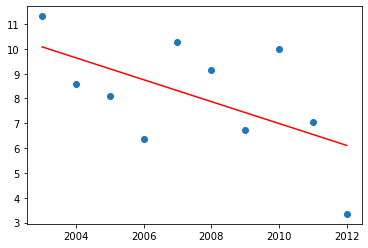

In [299]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [300]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.3301035733732266

In [301]:
all_act_2012_res_retired_slope = model.coef_
all_act_2012_res_retired_slope

array([[-0.4410467]])

#### 2003-2019 Regression

In [302]:
year = np.array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]).reshape((-1, 1))
activity_hours_per_day = np.array([atus_2003_unsp_retired_hpd, atus_2004_unsp_retired_hpd, atus_2005_unsp_retired_hpd,
                                   atus_2006_unsp_retired_hpd, atus_2007_unsp_retired_hpd, atus_2008_unsp_retired_hpd,
                                   atus_2009_unsp_retired_hpd, atus_2010_unsp_retired_hpd, atus_2011_unsp_retired_hpd,
                                   atus_2012_unsp_retired_hpd, atus_2013_unsp_retired_hpd, atus_2014_unsp_retired_hpd,
                                   atus_2015_unsp_retired_hpd, atus_2016_unsp_retired_hpd, atus_2017_unsp_retired_hpd,
                                   atus_2018_unsp_retired_hpd, atus_2019_unsp_retired_hpd]).reshape((-1, 1))

activity_hours_per_yr = [i * 365 for i in activity_hours_per_day]
#activity_hours_per_yr

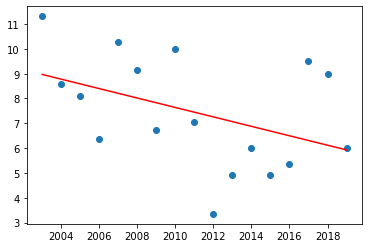

In [303]:
x = year
y = activity_hours_per_yr
x, y = np.array(x), np.array(y)

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)  

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [304]:
coefficient_of_determination = model.score(x,y) #R sqaure value 
coefficient_of_determination

0.18278258463509978

In [305]:
all_act_2019_res_retired_slope = model.coef_
all_act_2019_res_retired_slope

array([[-0.1901832]])